### C S 329E HW 4

## Decision Tree Classifier

## Louie Wang (zw5565)

For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [1]:
# import the libraries!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2
from sklearn import tree # Yes, you get to use scikit-learn this assignment, but only when I say!
import graphviz

## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X` containing the features of the data set (everything but `Type`), and `s_y`, the series containing just the label column (just `Type`)

In [2]:
df = pd.read_csv('melb_tree_train.csv')
df_X = df.drop(columns=['Type'])
s_y = df['Type']

## Q2 Define the entropy function
Implement a function `calc_entropy` that takes the labels series, s_y, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [3]:
def calc_entropy(s_y):
    n = len(s_y)
    if n <= 1:
        return 0 
    value, counts = np.unique(s_y, return_counts = True)
    p_i = counts/n
    sigma = 0
    for i in p_i:
        if i == 0:
            sigma -= 0
        sigma -= i * log2(i)
    return sigma

'''
def calc_entropy(s_y):
    p_i = s_y.value_counts(normalize = True)
    return -p_i.apply(lambda x: x * log2(x)).sum()
'''

'\ndef calc_entropy(s_y):\n    p_i = s_y.value_counts(normalize = True)\n    return -p_i.apply(lambda x: x * log2(x)).sum()\n'

## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [11]:
calc_entropy(s_y)

1.582533311426178

1.582533311426178

In [14]:
df_l1 = df[df['Landsize'] <= 200]
df_l1 = df_l1.iloc[:,[1,7]].sort_values('Landsize')['Type']
calc_entropy(df_l1)

'''
calc_entropy(s_y[df_X['Landsize'] <= 200])
'''

1.3456432116206725


"\ncalc_entropy(s_y[df_X['Landsize'] <= 200])\n"

1.3977725338275826

In [15]:
df_l2 = df[(df['Landsize'] > 200) & (df['Landsize'] <= 450)]
df_l2 = df_l2.iloc[:,[1,7]].sort_values('Landsize')['Type']
calc_entropy(df_l2)

1.4660501816027975

1.4660501816027975

In [16]:
df_l3 = df[(df['Landsize'] > 450)]
df_l3 = df_l3.iloc[:,[1,7]].sort_values('Landsize')['Type']
calc_entropy(df_l3)

1.09954792005911

1.09954792005911

## Q4 Define the Gini Index
Implement the function `calc_gini` that takes the labels series, s_y, as a parameter. Implement using the definition on p128 in the DM book.  Use only pandas library

In [17]:
def calc_gini(s_y):
    n = len(s_y)
    if n <= 1:
        return 0
    value, counts = np.unique(s_y, return_counts = True)
    p_i = counts/n
    sigma = 0
    for i in p_i:
        sigma += i ** 2
    return 1 - sigma

'''
def calc_gini(s_y):
    p_i = s_y.value_counts(normalize = True)
    return 1 - p_i.apply(lambda x: x ** 2).sum()
'''

'\ndef calc_gini(s_y):\n    p_i = s_y.value_counts(normalize = True)\n    return 1 - p_i.apply(lambda x: x ** 2).sum()\n'

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from 
    * Landsize $\in$ (0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [18]:
calc_gini(s_y)

0.6655601280292638

0.6655601280292638

In [10]:
calc_gini(df_l1)

0.5786025602368357

0.5786025602368357

In [11]:
calc_gini(df_l2)

0.6101021682602731

0.6101021682602731

In [12]:
calc_gini(df_l3)

0.43819341715976323

0.43819341715976323

## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)).  If you are on a Windows system and get stuck reach out in the homework channel to see if anyone else could get it working for tips and tricks.  If enough people with Windows can't make the visualization, I won't count it toward the homework grade.

In [13]:
df_X = pd.concat([df_X, pd.get_dummies(df_X['CouncilArea'], prefix = 'Council')], axis = 1)
df_X = df_X.drop(columns = 'CouncilArea')

In [14]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(df_X, s_y)
r = tree.export_text(clf, feature_names = df_X.columns.tolist())
print(r)

|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- class: u
|   |   |--- Price >  915000.00
|   |   |   |--- class: h
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: h
|   |   |--- Landsize >  429.00
|   |   |   |--- class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- class: u
|   |   |--- Landsize >  76.00
|   |   |   |--- class: t
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- class: t
|   |   |--- Landsize >  391.00
|   |   |   |--- class: h



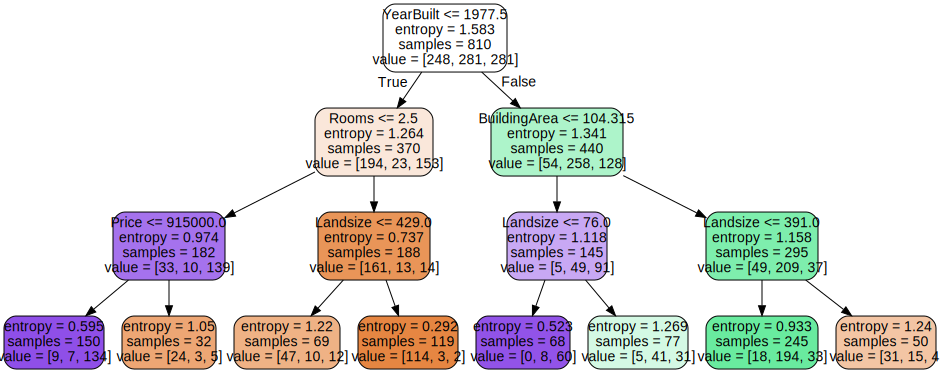

In [15]:

graph_data = tree.export_graphviz(clf, out_file = None, feature_names = df_X.columns, filled = True, rounded = True)
graph = graphviz.Source(graph_data)
graph

'''
dot_data = tree.export_graphviz(clf, out_file = None,
                        feature_name = df_X.columns.to_list(),
                        class_names = ['h','t','u'],
                        filled = True, rounded = True,
                        special_characters =  True)
graph = graphviz.Source(dot_data)
graph
'''

Analysis: <br>Since the quality of the split is determined by the gain, we'd like to find the gain of each split shown in the tree. <br> $ Gain = Impurity(p) - \sum_{i=1}^{k}\frac{n_i}{n} Impurity(i)$ <br> The smallest entropy we found is 0.292, when partitioning as $YearBuilt \leq 1977.5, Rooms > 2.5$, and $Landsize > 429$. <br> The largest entropy we found is 1.269, when partitioning as $YearBuilt > 1977.5, BuildingArea \leq 104.315$, and $Landsize > 76$. <br> After calculating the gain for each partition, we find that the smallest gain $\approx 0.446$, partitioning by $YearBuilt \leq 1977.5, Rooms > 2.5$, and $Landsize > 429.0$. 

## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data.

Use the scikit-learn library to create decision trees with the following configurations

    - Vary the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Vary the max depth from 2 to 15 with the Entropy as the impurity measure


Evaluate the accuracy of each decision tree with both the 
  - Training set
  - Test set

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis).

In [16]:
df_test = pd.read_csv('melb_tree_test.csv')

In [17]:
df_X_2 = pd.concat([df_test.drop(columns = 'Type'), pd.get_dummies(df_test['CouncilArea'])], axis = 1).drop(columns = 'CouncilArea')
s_y_2 = df_test['Type']

In [18]:
def accuracy(prediction, original):
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == original[i]:
            correct += 1
        else:
            correct += 0
    return correct/len(prediction)

In [19]:
train = []
test = []
for m in ['entropy','gini']:
    for i in range(2,16):
        clf = tree.DecisionTreeClassifier(criterion = m, max_depth = i)
        clf = clf.fit(df_X, s_y)
        predict_train = clf.predict(df_X)
        predict_test = clf.predict(df_X_2)
        accuracy_train = accuracy(predict_train, s_y)
        accuracy_test = accuracy(predict_test, s_y_2)
        train.append(accuracy_train)
        test.append(accuracy_test)

train_entropy = train[:14]
train_gini = train[14:]

test_entropy = test[:14]
test_gini = test[14:]

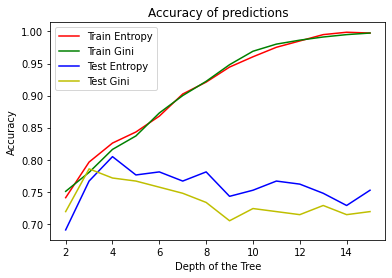

In [20]:
depth = [x for x in range(2,16)]
plt.plot(depth,train_entropy,'r',label = 'Train Entropy')
plt.plot(depth,train_gini,'g',label = 'Train Gini')
plt.plot(depth,test_entropy,'b',label = 'Test Entropy')
plt.plot(depth,test_gini,'y',label = 'Test Gini')
plt.legend()
plt.title('Accuracy of predictions')
plt.xlabel('Depth of the Tree')
plt.ylabel('Accuracy')
plt.show()

Analysis of the trend: <br> The accuracy of predictions are fairly consistent within each modeling between two methods of calculating impurities. <br> Within the training dataset, as the depth of tree increases, the accuracy is also increasing. <br> But within the testing dataset, there's a general declination of accuracy as the depth of tree increases, except for a small jump of accuracy when the depth is smaller than 4.